*Serhii Vidernikov Y4459773H*

*Nikita Polyanskiy Y4441167L*


# Colorectal histology dataset with LeNet 5

# Preview: Neural Network examples with `tf.keras`

- `tf.keras` Software (http://keras.io/);

- Visual example of LeNet-5 (http://yann.lecun.com/exdb/lenet/) using MNIST digits dataset;

- Examples with common neural network topologies (https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/).

## Colorectal histology

Methods to diagnose colorectal using histology images (<https://zenodo.org/record/53169#.XGZemKwzbmG>, <https://www.tensorflow.org/datasets/catalog/colorectal_histology>)

In this case, the purpose is to classify the type of histology in a given image in the following categories:

- 0: TUMOR
- 1: STROMA
- 2: COMPLEX
- 3: LYMPHO
- 4: DEBRIS
- 5: MUCOSA
- 6: ADIPOSE
- 7: EMPTY

## Local instalation (option 1)

Install the following Python packages to run this notebook

`pip install pip -U`

`pip install tensorflow jupyter`

## Google Colab (option 2)

[Google Colab](https://colab.research.google.com/) is a research project created to help disseminate machine learning education and research. It's a `Jupyter notebook` environment that requires no setup to use and runs entirely in the cloud.

Colaboratory notebooks are stored in [Google Drive](https://drive.google.com) and can be shared just as you would with Google Docs or Sheets. Colaboratory is free to use.

For more information, see our [FAQ](https://research.google.com/colaboratory/faq.html).

### How install extra packages
Google Colab installs a series of basic packages if we need any additional package just install it.

In [ ]:
#!pip install scikit-learn -U

## Import packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

from keras.optimizers import SGD

from keras.utils import np_utils
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

## Define global constants

Lets start with a few epochs to test learning network parameters

In [ ]:
batch_size = 32 #Lote ok
nb_classes = 2  # values = 2 or 8
epochs = 100

# Scaling input image to theses dimensions
img_rows, img_cols = 32,32

## Load image database

In [ ]:
def format_example(image):
    image = tf.cast(image, tf.float32)
    # Normalize the pixel values
    image = image / 255.0
    # Resize the image
    image = tf.image.resize(image, (img_rows, img_cols))
    return image


def load_data(name="colorectal_histology"):
  train_ds = tfds.load(name, split=tfds.Split.TRAIN, batch_size=-1)
  train_ds['image'] = tf.map_fn(format_example, train_ds['image'], dtype=tf.float32)
  numpy_ds = tfds.as_numpy(train_ds)
  X, y = numpy_ds['image'], numpy_ds['label']

  return np.array(X), np.array(y)

## Plot images

In [ ]:
def plot_symbols(X,y,n=15):
    index = np.random.randint(len(y), size=n)
    plt.figure(figsize=(25, 2))
    for i in np.arange(n):
        ax = plt.subplot(1,n,i+1)
        plt.imshow(X[index[i],:,:,:])
        plt.gray()
        ax.set_title(f'{y[index[i]]}-{index[i]}')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

## Build LeNet5 structure

<center><img src="https://www.dlsi.ua.es/~juanra/UA/curso_verano_DL/images/LeNet5.jpg"></center>

In [1]:
#
# Build an ANN structure - LeNet5
#

def cnn_model():
    #
    # Neural Network Structure
    #
    
    model = Sequential()
    activation = "relu"
    
    model.add(layers.Conv2D(6, (5, 5)))
    model.add(layers.Activation(activation))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(16, (5, 5)))
    model.add(layers.Activation(activation))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        
    model.add(layers.Flatten())
    
    model.add(layers.Dense(120))
    model.add(layers.Activation(activation))
    
    model.add(layers.Dense(84))
    model.add(layers.Activation(activation))
    
    model.add(layers.Dense(nb_classes))
    model.add(layers.Activation('softmax'))

    return model

## Start to run the program

### Load data

In [ ]:
##################################################################################
# Main program

X, y = load_data()

print(X.shape, 'train samples')
print(img_rows,'x', img_cols, 'image size')
print(epochs,'epochs')

(5000, 32, 32, 3) train samples
32 x 32 image size
100 epochs


Only for binary classification. All number of classes greater than 0 will be set to 1.

In [ ]:
if nb_classes==2:
  y[y>0] = 1

### Let to see examples of the dataset

In [ ]:
plot_symbols(X, y, 15)

## Number of examples per class

In [ ]:
pd.DataFrame({'ncount':pd.Series(y).value_counts(), '% ncount':pd.Series(y).value_counts(normalize=True)*100})

ncount  % ncount
1    4375      87.5
0     625      12.5

## Split examples in training/test sets

This section is introductory to serve as a simple example. To test the model created in different situations, a 10 cross validation (10-CV) strategy should be used. 

In [ ]:

#Codigo que se daba inicialmente
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# print(f'X_train {X_train.shape} X_test {X_test.shape}')
# print(f'y_train {y_train.shape} y_test {y_test.shape}')

#Usando StratifiedKfold hacer cross validation
i=0
skf = StratifiedKFold(n_splits = 10, random_state = 890, shuffle= True)
for train_index, test_index in skf.split(X,y):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


### Model and optimizers

Test [optimizer](https://keras.io/optimizers/) parameter with `sgd`, `adadelta` or `adam` values in order to check the final precision achieved.

In [ ]:
model = cnn_model()
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=[tf.keras.metrics.AUC()])

y_Test2 = np_utils.to_categorical(y_test,nb_classes)
y_Train2 = np_utils.to_categorical(y_train,nb_classes)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

model.fit(X_train, y_Train2, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2, callbacks=[callback])

print(model.summary())

Epoch 1/100
127/127 - 2s - loss: 0.3204 - auc_9: 0.9384 - val_loss: 0.3626 - val_auc_9: 0.9291 - 2s/epoch - 12ms/step
Epoch 2/100
127/127 - 1s - loss: 0.2360 - auc_9: 0.9632 - val_loss: 0.1956 - val_auc_9: 0.9766 - 563ms/epoch - 4ms/step
Epoch 3/100
127/127 - 1s - loss: 0.1476 - auc_9: 0.9836 - val_loss: 0.1610 - val_auc_9: 0.9841 - 554ms/epoch - 4ms/step
Epoch 4/100
127/127 - 1s - loss: 0.1415 - auc_9: 0.9852 - val_loss: 0.1638 - val_auc_9: 0.9797 - 567ms/epoch - 4ms/step
Epoch 5/100
127/127 - 1s - loss: 0.1212 - auc_9: 0.9866 - val_loss: 0.1470 - val_auc_9: 0.9847 - 538ms/epoch - 4ms/step
Epoch 6/100
127/127 - 1s - loss: 0.1173 - auc_9: 0.9887 - val_loss: 0.1422 - val_auc_9: 0.9846 - 526ms/epoch - 4ms/step
Epoch 7/100
127/127 - 1s - loss: 0.1052 - auc_9: 0.9903 - val_loss: 0.1404 - val_auc_9: 0.9872 - 535ms/epoch - 4ms/step
Epoch 8/100
127/127 - 1s - loss: 0.0942 - auc_9: 0.9908 - val_loss: 0.1343 - val_auc_9: 0.9863 - 564ms/epoch - 4ms/step
Epoch 9/100
127/127 - 1s - loss: 0.0946 - 

In [ ]:
loss, acc = model.evaluate(X_test, y_Test2, batch_size=batch_size)
print(f'loss: {loss:.2f} acc: {acc:.2f}')

16/16 [==============================] - 0s 4ms/step - loss: 0.1110 - auc_9: 0.9835
loss: 0.11 acc: 0.98


In [ ]:
# Output prediction for the first five X_test images
model.predict(X_test[:5], batch_size=batch_size)

1/1 [==============================] - 0s 63ms/step


array([[6.7134141e-07, 9.9999928e-01],
       [6.7673624e-11, 1.0000000e+00],
       [1.8206477e-10, 1.0000000e+00],
       [7.7782022e-07, 9.9999917e-01],
       [7.3354434e-11, 1.0000000e+00]], dtype=float32)

## Prediction

### Testing AUC result for two and multiple classes

16/16 [==============================] - 0s 2ms/step
AUC 0.9594 


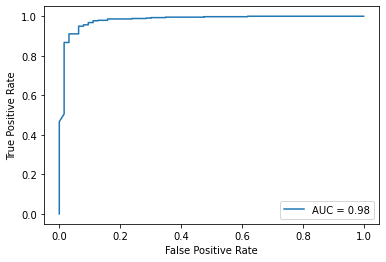

In [ ]:
y_scores = model.predict(X_test) # Confidence prediction per class
y_pred = y_scores.argmax(axis=1) # Select classes with most confidence prediction

if nb_classes ==  2:
  print(f'AUC {metrics.roc_auc_score(y_test, np.round(y_scores[:,1],2)):.4f} ')
  fpr, tpr, _ = metrics.roc_curve(y_test, y_scores[:,1],pos_label=1)
  #print(fpr, tpr)

  roc_auc = metrics.auc(fpr, tpr)
  roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
  
else:
  print(f'AUC {metrics.roc_auc_score(y_test, y_scores, multi_class = "ovr"):.4f} ')

## More metrics about results

We can find more information about `precision`, `recall` and `f1` metrics in <https://en.wikipedia.org/wiki/Precision_and_recall>.

In [ ]:
print('Predictions', pd.Series(y_pred).value_counts(),'\n')

print('Confusion matrix')
print(metrics.confusion_matrix(y_test,y_pred),'\n')

target_names = ['TUMOR', 'HEALTHY'] if nb_classes ==  2 else ['TUMOR','STROMA','COMPLEX','LYMPHO','DEBRIS','MUCOSA','ADIPOSE','EMPTY']

print(metrics.classification_report(y_test, y_pred, target_names=target_names))

Predictions 1    436
0     64
dtype: int64 

Confusion matrix
[[ 55   8]
 [  9 428]] 

              precision    recall  f1-score   support

       TUMOR       0.86      0.87      0.87        63
     HEALTHY       0.98      0.98      0.98       437

    accuracy                           0.97       500
   macro avg       0.92      0.93      0.92       500
weighted avg       0.97      0.97      0.97       500

